# UTS Regression Group.....

ARVIN LIENARDI                          (23101910083)

MATTHEW FERNANDO NABASA NAINGGOLAN      (23101910057)

KEVIN ADRIAN HALIM                      (23101910055)

JONATHAN WILLIAM                        (23101910030)

ZEFANYA DENADA GRACE SITANGGANG         ()

## Importing packages

In [ ]:
!pip install statsmodels
!pip install statsmodels.compat
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns 
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.simplefilter(action='ignore')
from sklearn.preprocessing import MinMaxScaler
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn import preprocessing
from statsmodels.compat import lzip

     |████████████████████████████████| 9.5 MB 14.8 MB/s 
     |████████████████████████████████| 231 kB 58.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement statsmodels.compat (from versions: none)
ERROR: No matching distribution found for statsmodels.compat
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Data Cleaning and overview (DONE)

In [ ]:
df=pd.read_csv('Data_Mobil_Indonesia.csv')
df.head()

,ID_Pelanggan,Level_Risiko,Merek_Mobil,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,...,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,JT_Kota,JT_JalanRaya,Harga_Mobil,Unnamed: 26
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,NaN
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,NaN
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,NaN
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,NaN
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,NaN


In [ ]:
df.isnull().sum()

ID_Pelanggan        0
Level_Risiko        0
Merek_Mobil         0
BBM                 0
Tipe_Mobil          0
Pintu_Mobil         0
Badan_Mobil         0
Roda_Penggerak      0
Lokasi_Mesin        0
Sumbu_Roda          0
Panjang             0
Lebar               0
Tinggi              0
Berat               0
Mesin               0
Silinder            0
Ukuran_Mesin        0
Sistem_BBM          0
Rasio_Bore          0
Stroke              0
Kompresi            0
Daya_Kuda           0
RPM                 0
JT_Kota             0
JT_JalanRaya        0
Harga_Mobil         0
Unnamed: 26       205
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Pelanggan    205 non-null    int64  
 1   Level_Risiko    205 non-null    int64  
 2   Merek_Mobil     205 non-null    object 
 3   BBM             205 non-null    object 
 4   Tipe_Mobil      205 non-null    object 
 5   Pintu_Mobil     205 non-null    object 
 6   Badan_Mobil     205 non-null    object 
 7   Roda_Penggerak  205 non-null    object 
 8   Lokasi_Mesin    205 non-null    object 
 9   Sumbu_Roda      205 non-null    float64
 10  Panjang         205 non-null    float64
 11  Lebar           205 non-null    float64
 12  Tinggi          205 non-null    float64
 13  Berat           205 non-null    int64  
 14  Mesin           205 non-null    object 
 15  Silinder        205 non-null    object 
 16  Ukuran_Mesin    205 non-null    int64  
 17  Sistem_BBM      205 non-null    obj

Removing Unnecessary Columns

In [ ]:
df=df.drop(['ID_Pelanggan', 'Unnamed: 26'], axis=1)
df.head()

,Level_Risiko,Merek_Mobil,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,Panjang,...,Ukuran_Mesin,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,JT_Kota,JT_JalanRaya,Harga_Mobil
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df['Merek_Mobil'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

DITEMUKAN 22 MEREK MOBIL : alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, buick, mercury, mitsubishi nissan, peugeot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo 

GROUPING MEREK MOBIL BY BRAND

In [ ]:
List=[]
for i in range (len(df['Merek_Mobil'])):
    brand=df['Merek_Mobil'][i].split()
    brand2=brand[0]
    List.append(brand2)
df['Merek_Mobil2']=List
df.head()

,Level_Risiko,Merek_Mobil,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,Panjang,...,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,JT_Kota,JT_JalanRaya,Harga_Mobil,Merek_Mobil2
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
df['Merek_Mobil2'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
replacements = {'Merek_Mobil2': {'maxda': 'mazda', 'Nissan': 'nissan','porcshce':'porsche','toyouta':'toyota'
,'vokswagen':'volkswagen','vw':'volkswagen' }}

df.replace(replacements, inplace=True)
df['Merek_Mobil2'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df=df.drop(['Merek_Mobil'],axis=1)
df=df.rename(columns={'Merek_Mobil2':'Merek_Mobil'})
df.head()

,Level_Risiko,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,Panjang,Lebar,...,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,JT_Kota,JT_JalanRaya,Harga_Mobil,Merek_Mobil
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## A.) Data Visualization (DONE)

In [ ]:
#Histogram, boxplot, bar graph, heatmap dll

### Heatmap

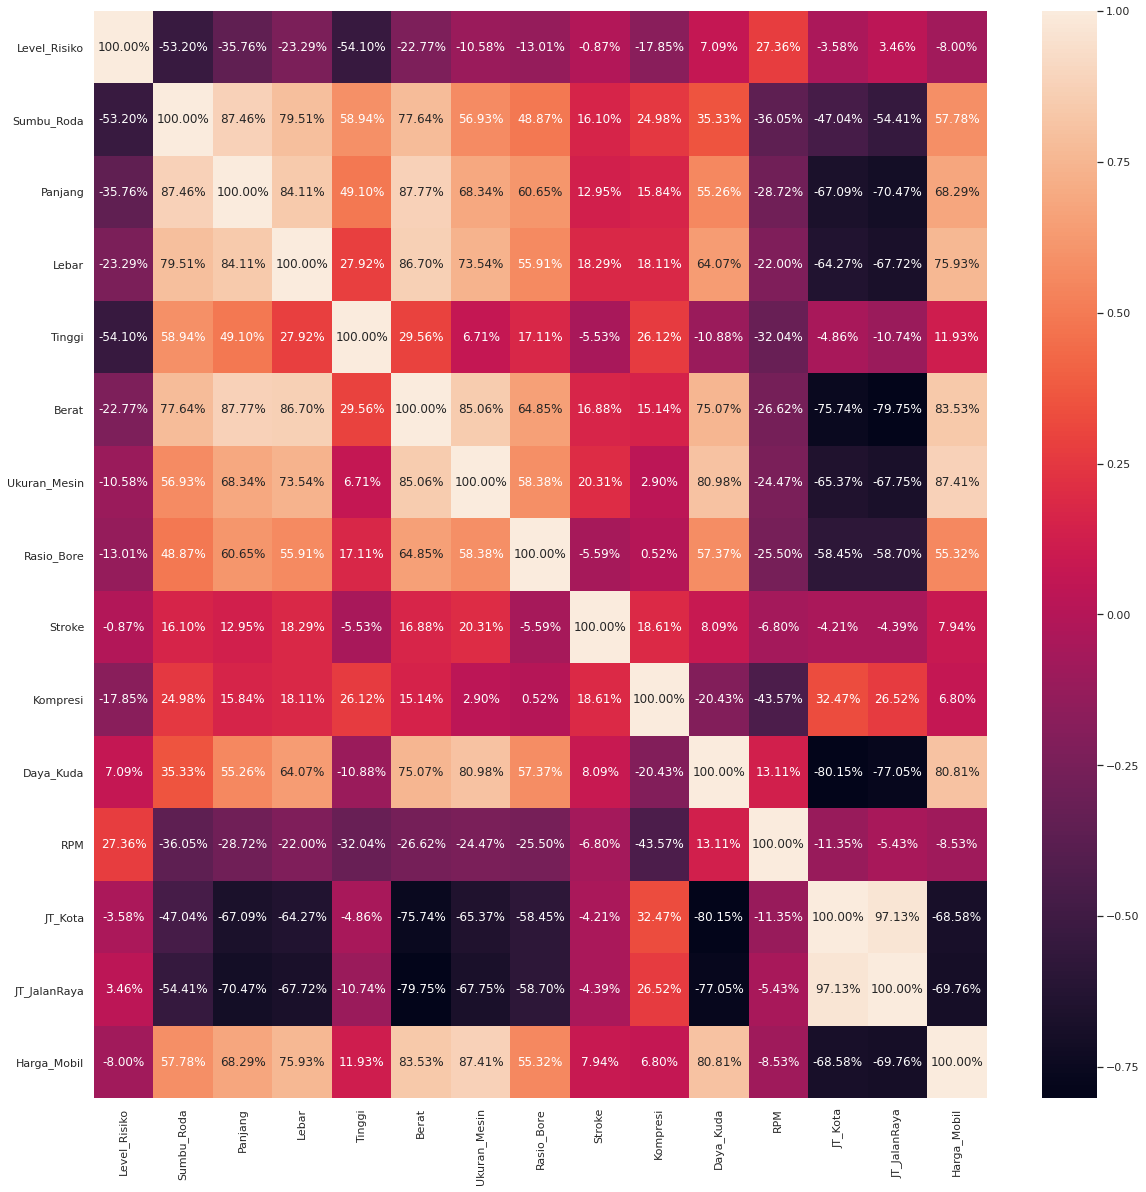

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.show()

### Graphs 

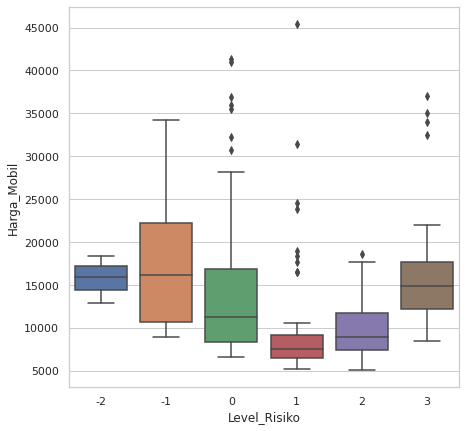

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=df, x='Level_Risiko', y='Harga_Mobil')
plt.show()

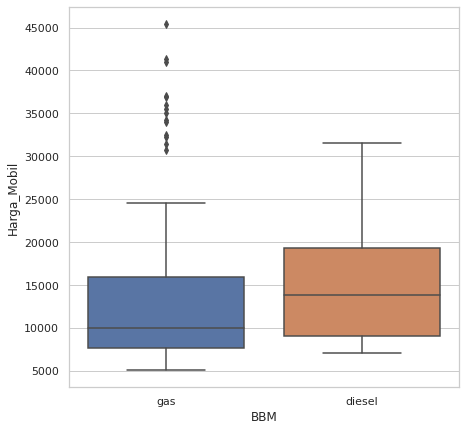

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=df, x='BBM', y='Harga_Mobil')
plt.show()

In [ ]:
    #Pada boxplot diatas bisa disimpulkan bahwa data menunjukan mobil dengan bahan bakar diesel memiliki harga yang lebih mahal
    #jika dibandingkan dengan mobil berbahan bakar gas. Namun ada beberapa outliers pada mobil berbahan bakar gas dengan rentang harga
    #30000 keatas, hal tersebut karena ada beberapa jenis mobil berbahan bakar gas lebih mahal dibandingkan data keseluruhan mobil
    #erbahan bakar diesel.

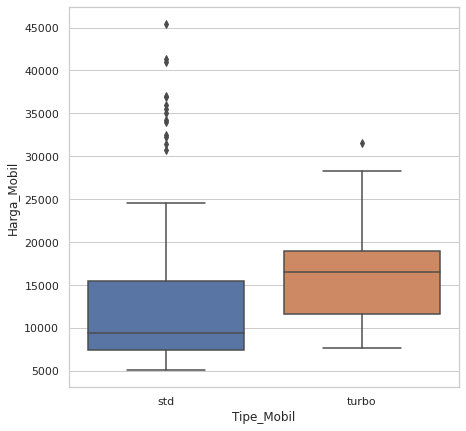

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=df, x='Tipe_Mobil', y='Harga_Mobil')
plt.show()

In [ ]:
#Pada boxplot diatas bisa disimpulkan bahwa mobil dengan tipe turbo lebih mahal dengan rentang harga 15.000 sampai kurang dari 30.000
#sedangkan mobil standard dengan rentang harga 5000 sampai 25000. Walaupun masih ada beberapa outliers pada mobil standard dengan
#harga diatas $30.000, namun bar pada mobil turbo menutupi lower-upper whisker yang berarti keselurhan data data mobil turbo lebih
#mahal dibandingkan mobil standard.

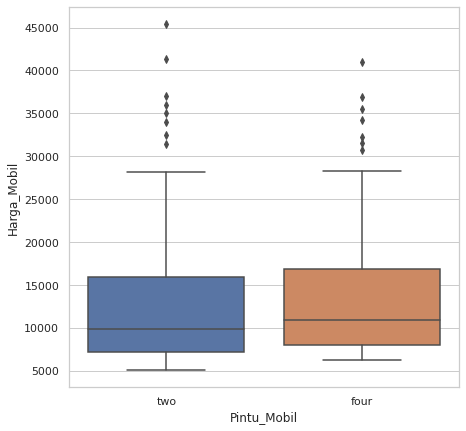

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=df, x='Pintu_Mobil', y='Harga_Mobil')
plt.show()

In [ ]:
#Pada boxplot diatas dua ataupun empat pintu pada mobil tidak jauh berbeda dalam mempengaruhi harga mobil karena memiliki penyebaran
#lower-upper whisker dan kuartal yang tidak jauh berbeda. Namun mobil dengan empat pintu memiliki bar quartile yang sedikit lebih tinggi,
#jadi mobil dengan empat pintu lebih mahal jika dibandingkan dengan mobil dengan dua pintu.

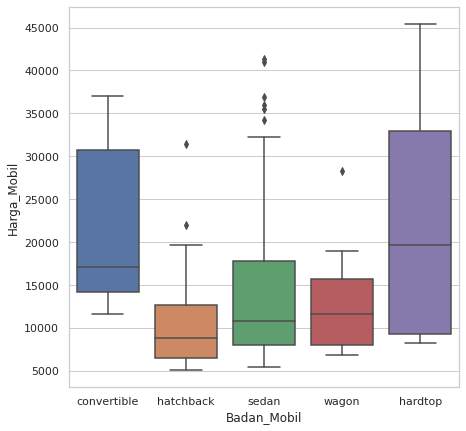

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=df, x='Badan_Mobil', y='Harga_Mobil')
plt.show()

In [ ]:
#Pada boxplot diatas bisa dilihat mean atau rata rata harga pada hatchback, seda, dan wagon berdekatan, yang mengartikan rata rata
#harga untuk ketiga tipe mobil itu direntang yang sama, begitu juga tipe mobil convertible dan hardtop yang memiliki rentang mean 
#yang berdekatan. Namun untuk tipe mobil yang paling mahal adalah hard top karena memiliki upper whisker diangka 45000, sedangkan
#tipe mobil yang paling murah adalah hatchback karena dimulai diangka 5000.

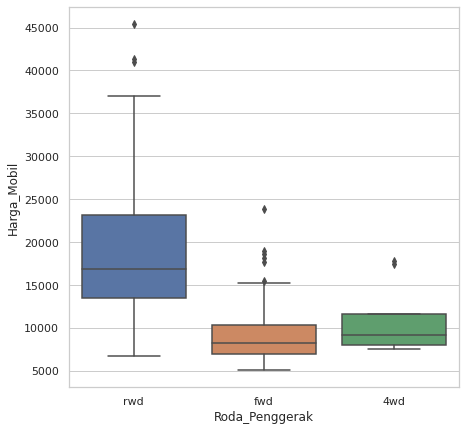

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=df, x='Roda_Penggerak', y='Harga_Mobil')
plt.show()

In [ ]:
#Pada boxplot diatas bisa disimpulkan bahwa mobil RWD memiliki variasi harga yang lebih bermacam dengan rentang harga 6000 sampai
#35000 sebagai harga yang paling mahal diantara jenis mobil FWD dan 4WD. Sedangkan 4WD menjual mobil dengan harga paling murah
#mulai diangka 5000.

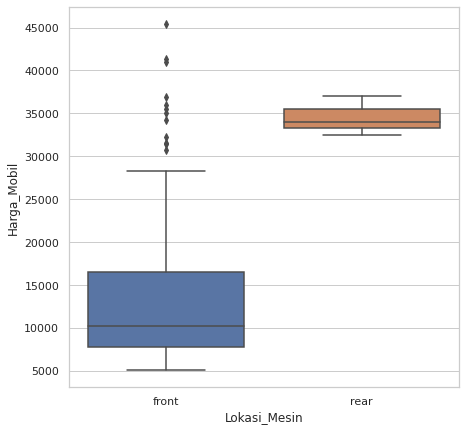

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=df, x='Lokasi_Mesin', y='Harga_Mobil')
plt.show()

Berdasarkan boxplot diatas, kami dapat melihat bahwa mayoritas penjualan mobil mempunyai mesin di sisi depan mesin mereka. Ini dikarenakan adanya variansi antar kumis boxplot tersebut dan outlier yang sangat banyak. Dapat dilihat juga bahwa harga mobil dengan mesin di depan mendominasi semua pangsa pasar bermulai dari 5000 sampai nilai 45000 (termasuk outliers).

Sedangkan mobil dengan mesin di sisi belakang menjadi minoritas. Variansi antar kumis boxplot terlihat sangat sempit, yang menandakan bahwa harga mobil dengan mesin dibelakang tidak berfluktuatif berat. Kita juga bisa melihat bahwa pangsa pasar mobil dengan mesin belakang adalah mobil dengan harga yang mahal, dimana harga mobil tersebut bermulai dari 32000.

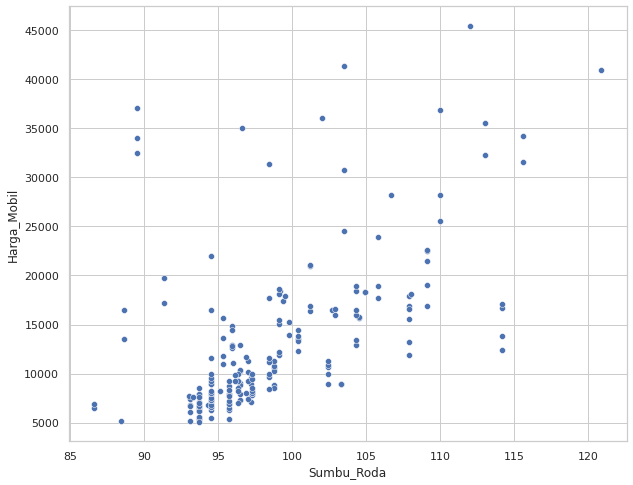

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='Sumbu_Roda', y='Harga_Mobil', ax=ax)
plt.show()

In [ ]:
Dari scatterplot diatas bisa disimpulkan bahwa sumbu roda mempengaruhi harga mobil secara positif atau r>0, dimana kenaikan pada sumbu
roda akan menaikkan harga mobil. Namun kenaikan ini tidak kuat karena masih ada beberapa outliers pada data dan adanya kumpulan 
data di satu titik.

SyntaxError: invalid syntax (2043645629.py, line 1)

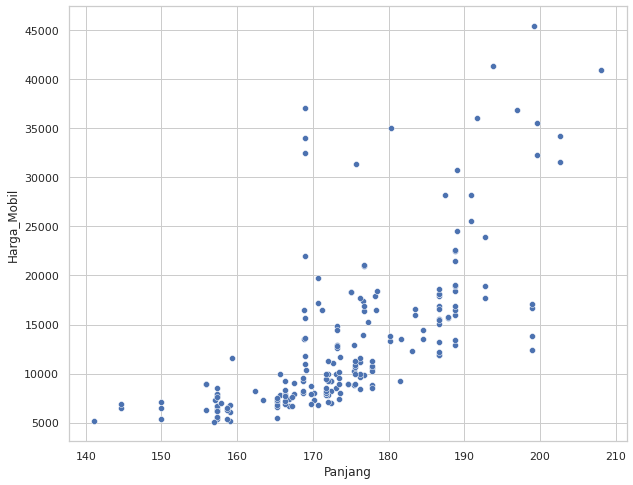

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='Panjang', y='Harga_Mobil', ax=ax)
plt.show()

Dari Scatterplot diatas, dapat dilihat bahwa harga mobil akan meningkat jika panjang mobil meningkat. Maka dapat disimpulkan bahwa hubungan kedua variabel ini bernilai positif (r>0). 

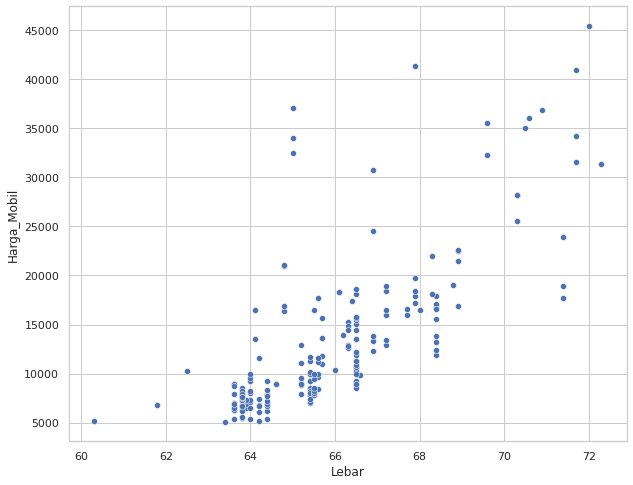

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='Lebar', y='Harga_Mobil', ax=ax)
plt.show()

Dari Scatterplot diatas, dapat dilihat bahwa harga mobil akan meningkat jika lebar mobil meningkat. Maka dapat disimpulkan bahwa hubungan kedua variabel ini bernilai positif (r>0). 

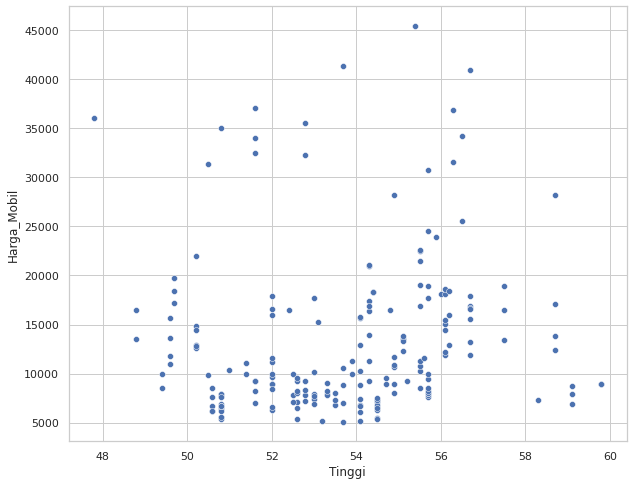

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='Tinggi', y='Harga_Mobil', ax=ax)
plt.show()

Dari Scatterplot diatas, dapat dilihat bahwa harga mobil dan Tinggi mobil tersebar tanpa pola yang jelas. Maka dapat disimpulkan bahwa tidak ada hubungan kedua variabel ini (r=0).

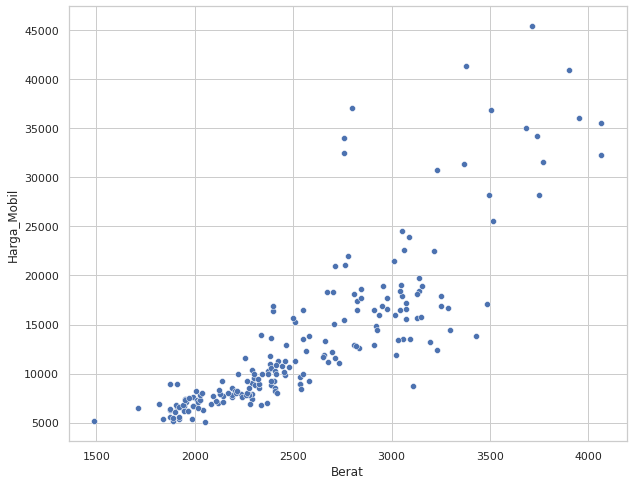

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='Berat', y='Harga_Mobil', ax=ax)
plt.show()

Dari Scatterplot diatas, dapat dilihat bahwa harga mobil akan meningkat jika berat mobil meningkat. Maka dapat disimpulkan bahwa hubungan kedua variabel ini bernilai positif (r>0).

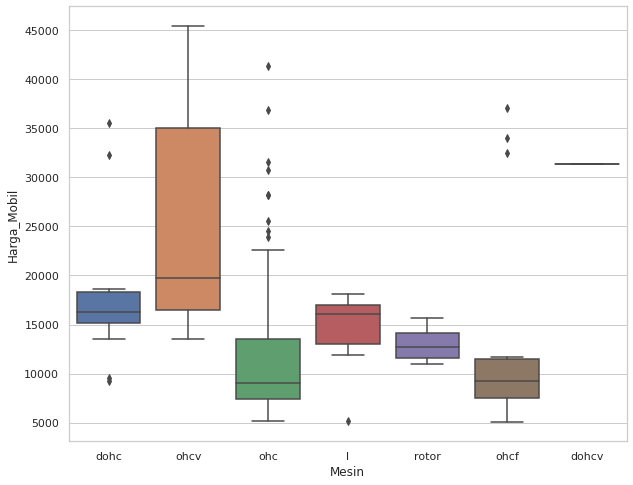

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='Mesin', y='Harga_Mobil', ax=ax)
plt.show()

Berdasarkan hasil boxplot yang ditunjukkan diatas,dapat dilihat bahwa kotak dan kumis boxplot tidak tersebar luas. Hal ini menandakan bahwa variansi harga mobil tidak berfluktuatif dengan berat yang disebabkan oleh jenis mesin yang digunakan.

Tetapi ada pengecualian untuk mesin jenis OHCV dan OHC. Mesin jenis ini memiliki boxplot dan kumis yang luas, sehingga dapat menandakan harga mobil yang fluktuatif. 

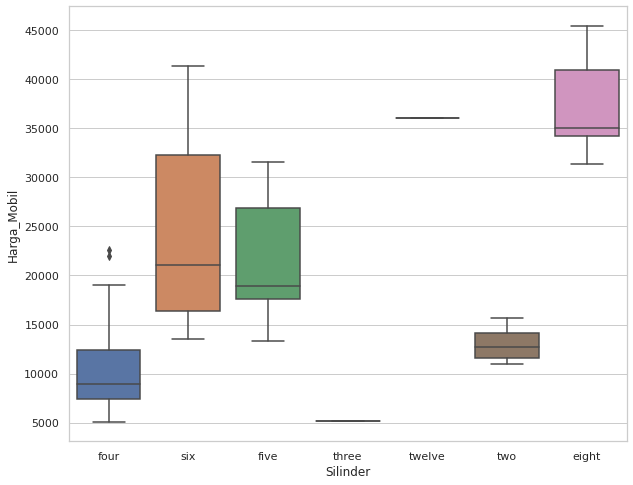

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='Silinder', y='Harga_Mobil', ax=ax)
plt.show()

Berdasarkan boxplot diatas, kami dapat melihat bahwa mayoritas harga berfluktuatif sebanyak $15.000 (Dilihat dari jarak kumis). Juga terlihat trend dimana lebih tinggi Silinder mobilnya, maka harga mobil tersebut juga meningkat. 

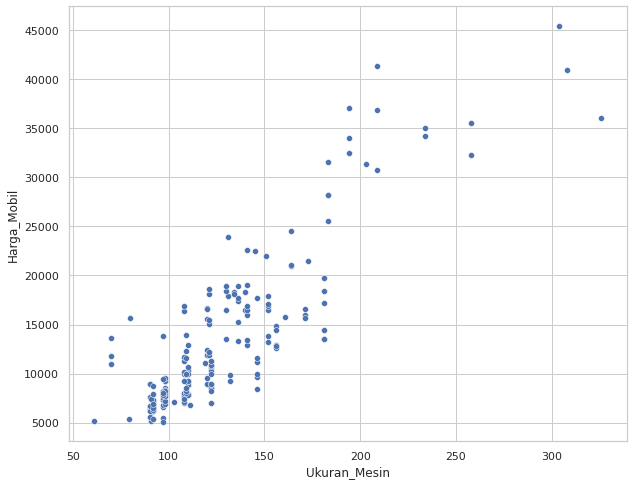

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='Ukuran_Mesin', y='Harga_Mobil', ax=ax)
plt.show()

Dari scatter plot diatas menunjukkan hubungan antara 'ukuran mesin' dan harga mobil berbentuk Linear Positif yang artinya Semakin besar ukuran mesin semakin besar(mahal) harga mobil. Namun, masih terdapat outlier dimana masih terdapat data yang berbeda jauh.

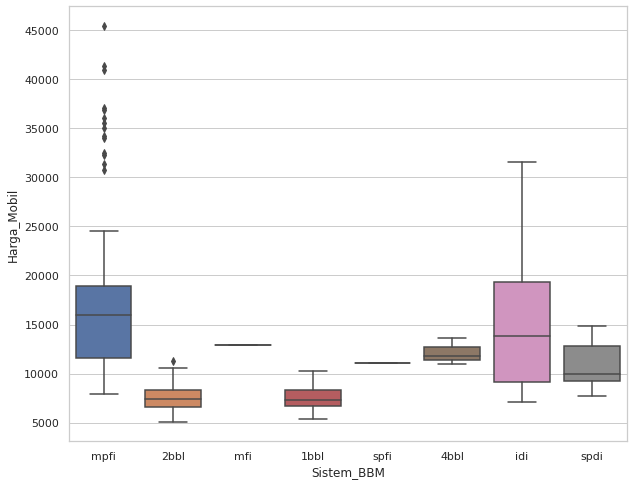

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='Sistem_BBM', y='Harga_Mobil', ax=ax)
plt.show()

Berdasarkan hasil boxplot yang ditunjukkan diatas,dapat dilihat bahwa kotak dan kumis boxplot tidak tersebar luas. Hal ini menandakan bahwa variansi harga mobil tidak berfluktuatif dengan berat yang disebabkan oleh sistem BBM mobil tersebut.

Tetapi ada pengecualian untuk sistem BBM IDI dan MPFI. Sistem BBM ini memiliki boxplot dan kumis yang luas, sehingga dapat menandakan harga mobil yang fluktuatif.

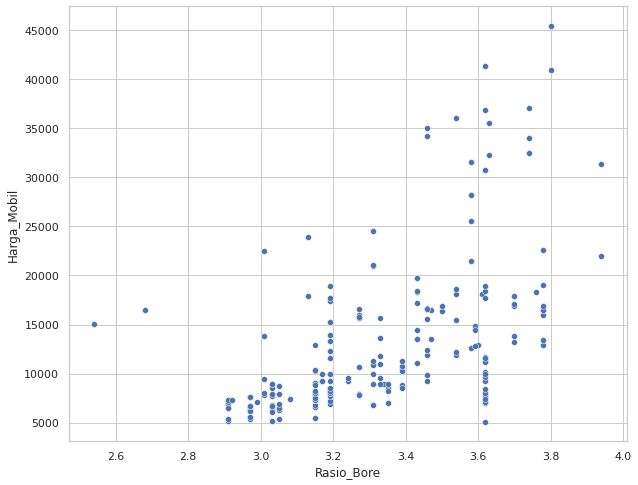

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='Rasio_Bore', y='Harga_Mobil', ax=ax)
plt.show()

Dari scatter plot diatas menunjukkan hubungan antara 'rasio bore' dan 'Harga mobil'. Scatter plot berbentuk Linear Positif yang artinya Semakin besar ratio bore semakin besar(mahal) harga mobil. Namun, masih terdapat outlier dimana masih terdapat data yang berbeda jauh.

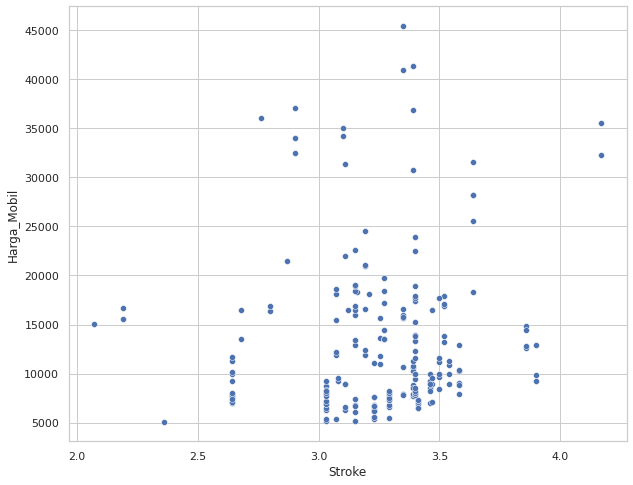

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='Stroke', y='Harga_Mobil', ax=ax)
plt.show()

Dari Scatterplot diatas, dapat dilihat bahwa harga mobil dan volume di dalam mesin yang merupakan fase dari siklus mesin mobil tersebar tanpa pola yang jelas. Maka dapat disimpulkan bahwa tidak ada hubungan kedua variabel ini (r=0).

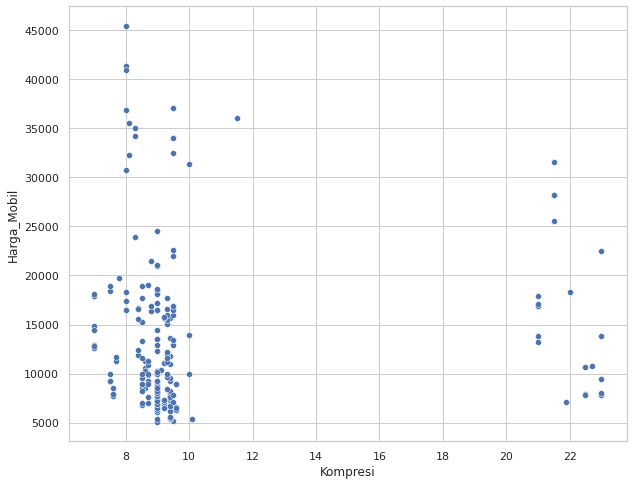

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='Kompresi', y='Harga_Mobil', ax=ax)
plt.show()

Dari Scatterplot diatas, dapat dilihat bahwa harga mobil dan RPM mobil tersebar tanpa pola yang jelas. Maka dapat disimpulkan bahwa tidak ada hubungan kedua variabel ini (r=0).

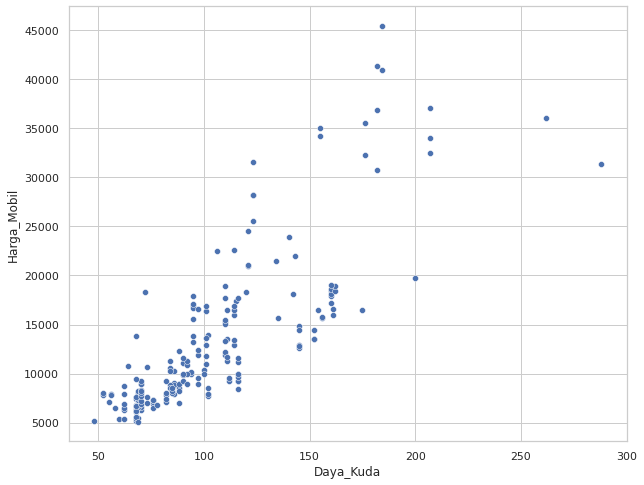

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='Daya_Kuda', y='Harga_Mobil', ax=ax)
plt.show()

Dari scatter plot diatas menunjukkan hubungan antara 'Daya Kuda' dan Harga mobil berbentuk Linear Positif yang artinya Semakin besar Daya Kuda semakin besar(mahal) harga mobil. Namun, masih terdapat outlier dimana masih terdapat data yang berbeda jauh.

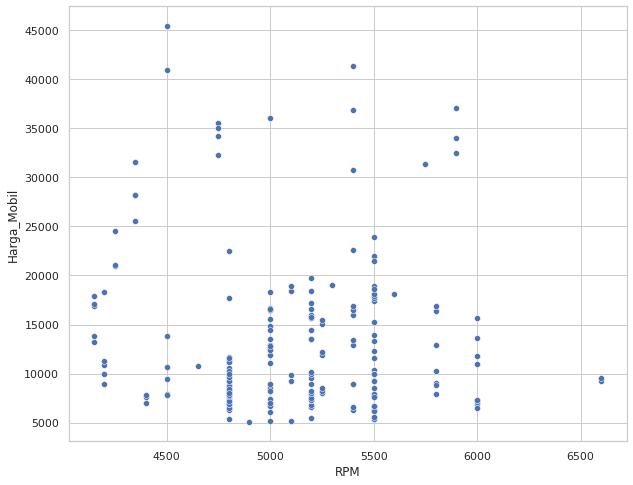

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='RPM', y='Harga_Mobil', ax=ax)
plt.show()

Dari Scatterplot diatas, dapat dilihat bahwa harga mobil dan RPM mobil tersebar tanpa pola yang jelas. Maka dapat disimpulkan bahwa tidak ada hubungan kedua variabel ini (r=0).

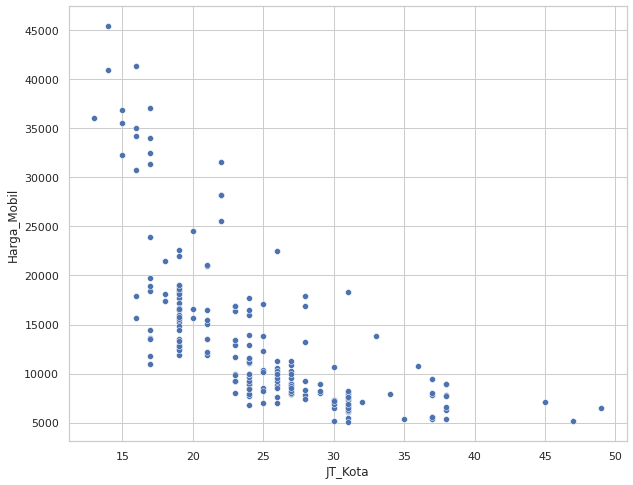

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='JT_Kota', y='Harga_Mobil', ax=ax)
plt.show()

Dari scatter plot diatas menunjukkan hubungan antara 'Jarak Tempuh di kota' dan harga mobil berbentuk Linear Negatif yang artinya Semakin besar jarak tempuh di kota semakin kecil(murah) harga mobil. Namun, masih terdapat outlier dimana masih terdapat data yang berbeda jauh.

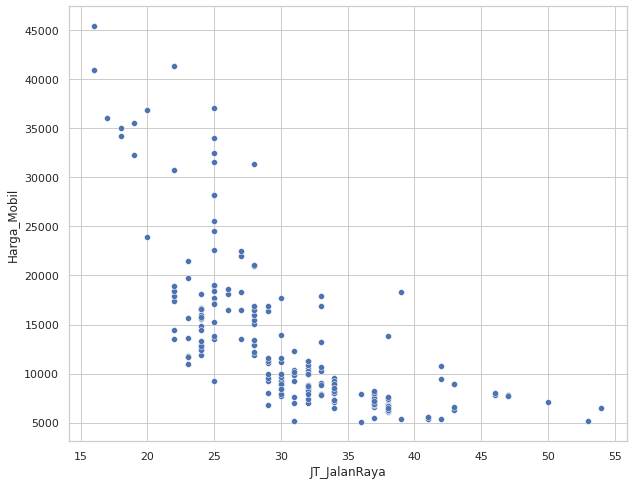

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='JT_JalanRaya', y='Harga_Mobil', ax=ax)
plt.show()

Dari scatter plot diatas menunjukkan hubungan antara 'Jarak Tempuh di jalan raya' dan harga mobil berbentuk Linear Negatif yang artinya Semakin besar jarak tempuh di jalan raya semakin kecil(murah) harga mobil.

## B.) Assigning Dummy Variable, Training &amp; Testing, Feature Selection, Model creation (DONE)

### Data Preparation &amp; Feature Selection

In [ ]:
df2=df.copy() #pure buat di dummies, train test dll
df3=df.copy() #buat jaga2 kalo df sama df2 uda keubah
df2.head()

,Level_Risiko,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,Panjang,Lebar,...,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,JT_Kota,JT_JalanRaya,Harga_Mobil,Merek_Mobil
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
replacements={"Silinder":{"four":4, "six":6,"five":5,"eight":8,"two":2,"twelve":12,"three":3}}
df2.replace(replacements,inplace=True)

In [ ]:
df2=pd.get_dummies(df2,drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Level_Risiko            205 non-null    int64  
 1   Sumbu_Roda              205 non-null    float64
 2   Panjang                 205 non-null    float64
 3   Lebar                   205 non-null    float64
 4   Tinggi                  205 non-null    float64
 5   Berat                   205 non-null    int64  
 6   Silinder                205 non-null    int64  
 7   Ukuran_Mesin            205 non-null    int64  
 8   Rasio_Bore              205 non-null    float64
 9   Stroke                  205 non-null    float64
 10  Kompresi                205 non-null    float64
 11  Daya_Kuda               205 non-null    int64  
 12  RPM                     205 non-null    int64  
 13  JT_Kota                 205 non-null    int64  
 14  JT_JalanRaya            205 non-null    in

In [ ]:
train,test=train_test_split(df2,test_size=0.25,random_state=42)
train_index=train.index
test_index=test.index

In [ ]:
y_train=train[["Harga_Mobil"]]
x_train=train[['Level_Risiko', 'Sumbu_Roda', 'Panjang', 'Lebar', 'Tinggi', 'Berat',
       'Ukuran_Mesin', 'Rasio_Bore', 'Stroke', 'Kompresi', 'Daya_Kuda', 'RPM',
       'JT_Kota', 'JT_JalanRaya', 'BBM_gas', 'Tipe_Mobil_turbo',
       'Pintu_Mobil_two', 'Badan_Mobil_hardtop', 'Badan_Mobil_hatchback',
       'Badan_Mobil_sedan', 'Badan_Mobil_wagon', 'Roda_Penggerak_fwd',
       'Roda_Penggerak_rwd', 'Lokasi_Mesin_rear', 'Mesin_dohcv', 'Mesin_l',
       'Mesin_ohc', 'Mesin_ohcf', 'Mesin_ohcv', 'Mesin_rotor', 'Sistem_BBM_2bbl', 'Sistem_BBM_4bbl', 'Sistem_BBM_idi',
       'Sistem_BBM_mfi', 'Sistem_BBM_mpfi', 'Sistem_BBM_spdi',
       'Sistem_BBM_spfi', 'Merek_Mobil_audi', 'Merek_Mobil_bmw',
       'Merek_Mobil_buick', 'Merek_Mobil_chevrolet', 'Merek_Mobil_dodge',
       'Merek_Mobil_honda', 'Merek_Mobil_isuzu', 'Merek_Mobil_jaguar',
       'Merek_Mobil_mazda', 'Merek_Mobil_mercury', 'Merek_Mobil_mitsubishi',
       'Merek_Mobil_nissan', 'Merek_Mobil_peugeot', 'Merek_Mobil_plymouth',
       'Merek_Mobil_porsche', 'Merek_Mobil_renault', 'Merek_Mobil_saab',
       'Merek_Mobil_subaru', 'Merek_Mobil_toyota', 'Merek_Mobil_volkswagen',
       'Merek_Mobil_volvo']]

In [ ]:
scaler = MinMaxScaler()
num_columns = np.array(x_train.select_dtypes(include = ["int64","float64"]).columns)
x_train[num_columns] = scaler.fit_transform(x_train[num_columns])


In [ ]:
x_train.head()

,Level_Risiko,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Ukuran_Mesin,Rasio_Bore,Stroke,Kompresi,...,Merek_Mobil_nissan,Merek_Mobil_peugeot,Merek_Mobil_plymouth,Merek_Mobil_porsche,Merek_Mobil_renault,Merek_Mobil_saab,Merek_Mobil_subaru,Merek_Mobil_toyota,Merek_Mobil_volkswagen,Merek_Mobil_volvo
90,0.6,0.272414,0.356897,0.190476,0.558333,0.088117,0.128906,0.321429,0.666667,0.93125,...,1,0,0,0,0,0,0,0,0,0
173,0.2,0.544828,0.534483,0.447619,0.591667,0.225634,0.203125,0.550000,0.700000,0.10625,...,0,0,0,0,0,0,0,1,0,0
93,0.6,0.272414,0.441379,0.190476,0.475000,0.091233,0.105469,0.435714,0.580952,0.15000,...,1,0,0,0,0,0,0,0,0,0
5,0.8,0.455172,0.563793,0.428571,0.441667,0.306186,0.257812,0.464286,0.633333,0.09375,...,0,0,0,0,0,0,0,0,0,0
167,0.8,0.406897,0.544828,0.361905,0.350000,0.320872,0.296875,0.771429,0.680952,0.14375,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
num_columns = np.array(y_train.select_dtypes(include = ["int64","float64"]).columns)
y_train[num_columns] = scaler.fit_transform(y_train[num_columns])

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [ ]:
selected_features=backward_elimination(x_train,y_train)
print(list(selected_features))
print(len(selected_features))

['Lebar', 'Berat', 'Ukuran_Mesin', 'Rasio_Bore', 'RPM', 'Tipe_Mobil_turbo', 'Badan_Mobil_hardtop', 'Badan_Mobil_hatchback', 'Badan_Mobil_sedan', 'Badan_Mobil_wagon', 'Lokasi_Mesin_rear', 'Mesin_l', 'Mesin_ohcf', 'Mesin_ohcv', 'Mesin_rotor', 'Sistem_BBM_2bbl', 'Merek_Mobil_bmw', 'Merek_Mobil_buick', 'Merek_Mobil_dodge', 'Merek_Mobil_honda', 'Merek_Mobil_mazda', 'Merek_Mobil_mitsubishi', 'Merek_Mobil_nissan', 'Merek_Mobil_peugeot', 'Merek_Mobil_plymouth', 'Merek_Mobil_porsche', 'Merek_Mobil_renault', 'Merek_Mobil_subaru', 'Merek_Mobil_toyota', 'Merek_Mobil_volkswagen']
30


### Model Validation

In [ ]:
x_train=sm.add_constant(x_train[selected_features])
model=sm.OLS(y_train,x_train)
model_fit=model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     148.4
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           3.84e-82
Time:                        12:21:51   Log-Likelihood:                 303.48
No. Observations:                 153   AIC:                            -549.0
Df Residuals:                     124   BIC:                            -461.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X): #calculating VIF
  vif = pd.DataFrame()
  vif["variables"]=X.columns
  vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return(vif)

In [ ]:
calc_vif(x_train)

,variables,VIF
0,const,80.775530
1,Lebar,5.203197
2,Berat,14.881202
3,Ukuran_Mesin,11.377595
4,Rasio_Bore,3.123568
5,RPM,2.323984
6,Tipe_Mobil_turbo,1.883614
7,Badan_Mobil_hardtop,2.143886
8,Badan_Mobil_hatchback,8.964883
9,Badan_Mobil_sedan,9.379319


In [ ]:
calc_vif(x_train.drop(["Lokasi_Mesin_rear"],axis=1))

,variables,VIF
0,const,80.775530
1,Lebar,5.203197
2,Berat,14.881202
3,Ukuran_Mesin,11.377595
4,Rasio_Bore,3.123568
5,RPM,2.323984
6,Tipe_Mobil_turbo,1.883614
7,Badan_Mobil_hardtop,2.143886
8,Badan_Mobil_hatchback,8.964883
9,Badan_Mobil_sedan,9.379319


In [ ]:
calc_vif(x_train.drop(["Lokasi_Mesin_rear", 'Merek_Mobil_peugeot'],axis=1))

,variables,VIF
0,const,80.775530
1,Lebar,5.203197
2,Berat,14.881202
3,Ukuran_Mesin,11.377595
4,Rasio_Bore,3.123568
5,RPM,2.323984
6,Tipe_Mobil_turbo,1.883614
7,Badan_Mobil_hardtop,2.143886
8,Badan_Mobil_hatchback,8.964883
9,Badan_Mobil_sedan,9.379319


In [ ]:
calc_vif(x_train.drop(["Lokasi_Mesin_rear", 'Merek_Mobil_peugeot','Berat'],axis=1))

,variables,VIF
0,const,80.500628
1,Lebar,4.488353
2,Ukuran_Mesin,6.167145
3,Rasio_Bore,3.027385
4,RPM,2.323860
5,Tipe_Mobil_turbo,1.763995
6,Badan_Mobil_hardtop,2.021320
7,Badan_Mobil_hatchback,8.955184
8,Badan_Mobil_sedan,9.379232
9,Badan_Mobil_wagon,4.827226


In [ ]:
calc_vif(x_train.drop(["Lokasi_Mesin_rear", 'Merek_Mobil_peugeot','Berat','Mesin_ohcf'],axis=1))

,variables,VIF
0,const,77.060014
1,Lebar,4.014395
2,Ukuran_Mesin,5.695161
3,Rasio_Bore,2.904506
4,RPM,2.268783
5,Tipe_Mobil_turbo,1.701421
6,Badan_Mobil_hardtop,1.941606
7,Badan_Mobil_hatchback,8.571966
8,Badan_Mobil_sedan,9.172286
9,Badan_Mobil_wagon,4.759776


### Feature Re-selection after VIF

In [ ]:
x_train=x_train.drop(["Lokasi_Mesin_rear", 'Merek_Mobil_peugeot','Berat','Mesin_ohcf'],axis=1)
model=sm.OLS(y_train,x_train)
model_fit=model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     118.2
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           5.28e-76
Time:                        12:22:10   Log-Likelihood:                 279.98
No. Observations:                 153   AIC:                            -506.0
Df Residuals:                     126   BIC:                            -424.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
x_train=x_train.drop(columns=['Sistem_BBM_2bbl'],axis=1)
x_train=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train)
model_fit=model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           1.29e-76
Time:                        12:22:13   Log-Likelihood:                 278.75
No. Observations:                 153   AIC:                            -505.5
Df Residuals:                     127   BIC:                            -426.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
x_train=x_train.drop(columns=['Merek_Mobil_subaru'],axis=1)
x_train=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train)
model_fit=model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     125.7
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           3.22e-77
Time:                        12:22:16   Log-Likelihood:                 277.49
No. Observations:                 153   AIC:                            -505.0
Df Residuals:                     128   BIC:                            -429.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### FINAL MODEL 

In [ ]:
x_train=x_train.drop(columns=['Mesin_l'],axis=1)
x_train=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train)
model_fit=model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           1.13e-77
Time:                        12:22:18   Log-Likelihood:                 275.80
No. Observations:                 153   AIC:                            -503.6
Df Residuals:                     129   BIC:                            -430.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
calc_vif(x_train)

,variables,VIF
0,const,69.192419
1,Lebar,3.511824
2,Ukuran_Mesin,4.978621
3,Rasio_Bore,2.424227
4,RPM,1.826010
5,Tipe_Mobil_turbo,1.381525
6,Badan_Mobil_hardtop,1.926595
7,Badan_Mobil_hatchback,8.069284
8,Badan_Mobil_sedan,8.685973
9,Badan_Mobil_wagon,4.484863


Setelah melakukan modeling, kami mendapatkan 23 independent variable yang signifikan. Independent Variable tersebut adalah Lebar, Ukuran Mesin, Rasio Bore, RPM, Tipe Mobil Turbo, Badan Mobil Hardtop, Badan Mobil Hatchback, Badan Mobil Sedan, Badan Mobil wagon, Mesih Ohcv, Mesin Rotor, Merek Mobil BMW, Merek Mobil Buick, Merek Mobil doge, Merek Mobil honda, Merek Mobil mazda, Merek Mobil mitsubishi, Merek Mobil nissan, Merek Mobil playmouth, Merek Mobil porsche, Merek Mobil renault, Merek Mobil toyota, dan Merek Mobil volkswagen. 23 variable tersebut merupakan independent yang signifikan setelah melakukan step wise elimination dan juga melakukan eliminasi melalui VIF.

### Train Data Prep

In [ ]:
x_test=sm.add_constant(test)
x_test=x_test[x_train.columns]
y_test=test[["Harga_Mobil"]]

In [ ]:
num_columns = np.array(x_test.select_dtypes(include = ["int64","float64"]).columns)
x_test[num_columns] = scaler.fit_transform(x_test[num_columns])


In [ ]:
num_columns = np.array(y_test.select_dtypes(include = ["int64","float64"]).columns)
y_test[num_columns] = scaler.fit_transform(y_test[num_columns])


In [ ]:
y_test

,Harga_Mobil
15,0.708135
9,0.351404
100,0.121613
132,0.185239
68,0.638674
95,0.073222
159,0.072918
162,0.113566
147,0.139559
182,0.072558


In [ ]:
x_test

,const,Lebar,Ukuran_Mesin,Rasio_Bore,RPM,Tipe_Mobil_turbo,Badan_Mobil_hardtop,Badan_Mobil_hatchback,Badan_Mobil_sedan,Badan_Mobil_wagon,...,Merek_Mobil_dodge,Merek_Mobil_honda,Merek_Mobil_mazda,Merek_Mobil_mitsubishi,Merek_Mobil_nissan,Merek_Mobil_plymouth,Merek_Mobil_porsche,Merek_Mobil_renault,Merek_Mobil_toyota,Merek_Mobil_volkswagen
15,0.0,0.578947,0.599190,0.797753,0.675676,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0.0,0.666667,0.283401,0.247191,0.729730,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0.0,0.429825,0.238866,0.471910,0.567568,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
132,0.0,0.543860,0.242915,0.707865,0.594595,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0.0,0.877193,0.493927,0.752809,0.108108,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
95,0.0,0.307018,0.145749,0.269663,0.567568,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
159,0.0,0.359649,0.198381,0.404494,0.189189,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
162,0.0,0.359649,0.149798,0.314607,0.351351,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
147,0.0,0.447368,0.190283,0.797753,0.567568,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
182,0.0,0.456140,0.145749,0.112360,0.351351,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y_pred=model_fit.predict(x_test)

In [ ]:
y_pred

15     0.651142
9      0.387168
100    0.137775
132    0.179167
68     0.630624
95     0.052581
159    0.042263
162    0.052139
147    0.117589
182    0.085853
191    0.265103
164    0.031468
65     0.150244
175    0.084681
73     0.908164
152    0.027376
18    -0.028617
82     0.229533
86     0.083221
143    0.116678
60     0.138267
101    0.272800
98     0.087968
30     0.018862
25     0.066871
16     0.666000
168    0.185626
195    0.246745
97     0.068220
194    0.245834
67     0.629713
120    0.042484
154    0.043015
202    0.343565
79     0.121230
69     0.650372
145    0.154153
55     0.224877
45     0.138059
84     0.227942
146    0.086556
66     0.120267
111    0.212056
153    0.043015
96     0.067309
38     0.138851
24     0.052143
139    0.013140
112    0.285378
29     0.243461
19     0.123331
178    0.353294
dtype: float64

## C.) Regression Equation

Y = 0.0737 + 0.1694(Lebar) +  0.8410( Ukuran Mesin)-0.1416(Rasio Bore) + 0.1435 (RPM) + 0.0685 ( Tipe Mobil Turbo) -0.0669 (Badan Mobil hardtop) - 0.1023(Badan Mobil Hatchback) -0.0876(Badan_Mobil_sedan) -0.0867(Badan_Mobil_wagon) -0.0761 (Mesin_ohcv) +0.1876 (Mesin_rotor) +0.1528 (Merek_Mobil_bmw) +0.1759 (Merek_Mobil_buick) -0.0915(Merek_Mobil_dodge)  -0.0883 (Merek_Mobil_honda) -0.0480(Merek_Mobil_mazda) -0.1086 (Merek_Mobil_mitsubishi) -0.0629 (Merek_Mobil_nissan) -0.1011 (Merek_Mobil_plymouth) + 0.2090 (Merek_Mobil_porsche) - 0.1109(Merek_Mobil_renault) - 0.0530(Merek_Mobil_toyota) -0.0609(Merek_Mobil_volkswagen )

## D.) Linear Model Assumption

### Linearity 

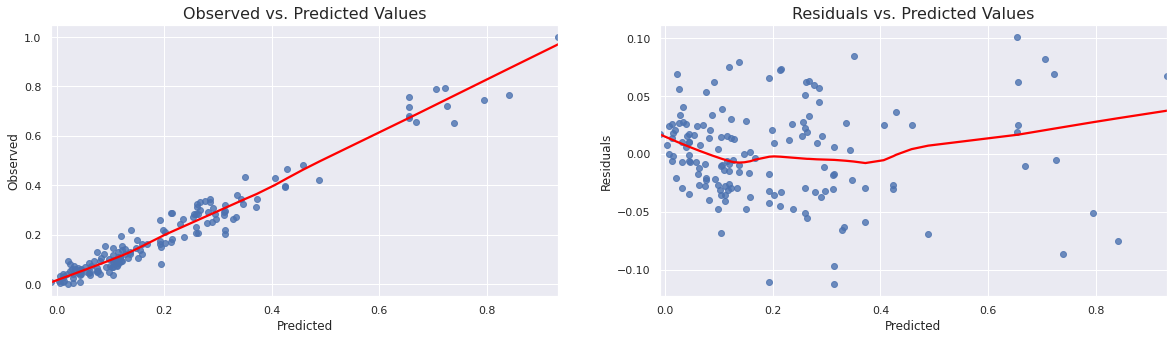

In [ ]:
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (20, 5.0)

def linearity_test(model, y):

    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y_train, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model_fit, y_test)   

In [ ]:
x_train=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train)
model_fit=model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           1.13e-77
Time:                        14:32:34   Log-Likelihood:                 275.80
No. Observations:                 153   AIC:                            -503.6
Df Residuals:                     129   BIC:                            -430.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Mereferensi dari hasil OLS kami yang final yang telah melakukan feature selection. dapat diasumsikan model OLS kami hanya melibatkan  independent variable yang significant terhadap model. 

dengan hasil resdiual plot yang cukup random(tidak ada pola tertentu), plotting observed value vs predicted value yang linear. ditambah hasil R-square yang cukup besar (0.958). model OLS kami sudah linear

### Multicollinearity 

In [ ]:
calc_vif(x_train)

,variables,VIF
0,const,69.192419
1,Lebar,3.511824
2,Ukuran_Mesin,4.978621
3,Rasio_Bore,2.424227
4,RPM,1.826010
5,Tipe_Mobil_turbo,1.381525
6,Badan_Mobil_hardtop,1.926595
7,Badan_Mobil_hatchback,8.069284
8,Badan_Mobil_sedan,8.685973
9,Badan_Mobil_wagon,4.484863


Dari Hasil VIF, ditemukan seluruh independent variable memiliki VIF &lt;10. sehingga tidak ada multikolinearitas antar independent variable

### Normality

In [ ]:
from scipy.stats import kstest
data=x_train.drop(columns=['const'],axis=1)

In [ ]:
for i in data.columns:
    print([i])
    a,b=kstest(data[i],'norm')
    print("statistics",a,"pvalue",b)
    if b>0.05:
        print('probably normal')
        print()
    else:
        print('probably not normal')
        print()

['Lebar']
statistics 0.5484487615902819 pvalue 1.0060975665736068e-43
probably not normal

['Ukuran_Mesin']
statistics 0.5049918987286023 pvalue 1.1741830995553335e-36
probably not normal

['Rasio_Bore']
statistics 0.5911482208708139 pvalue 1.7569233554876893e-51
probably not normal

['RPM']
statistics 0.5 pvalue 6.786438022125539e-36
probably not normal

['Tipe_Mobil_turbo']
statistics 0.5 pvalue 6.786438022125539e-36
probably not normal

['Badan_Mobil_hardtop']
statistics 0.5 pvalue 6.786438022125539e-36
probably not normal

['Badan_Mobil_hatchback']
statistics 0.5 pvalue 6.786438022125539e-36
probably not normal

['Badan_Mobil_sedan']
statistics 0.5 pvalue 6.786438022125539e-36
probably not normal

['Badan_Mobil_wagon']
statistics 0.5 pvalue 6.786438022125539e-36
probably not normal

['Mesin_ohcv']
statistics 0.5 pvalue 6.786438022125539e-36
probably not normal

['Mesin_rotor']
statistics 0.5 pvalue 6.786438022125539e-36
probably not normal

['Merek_Mobil_bmw']
statistics 0.5 pvalue

In [ ]:
ksdata = kstest(y_train, 'norm')
print(ksdata)


KstestResult(statistic=0.8413447460685429, pvalue=3.176287966086622e-122)


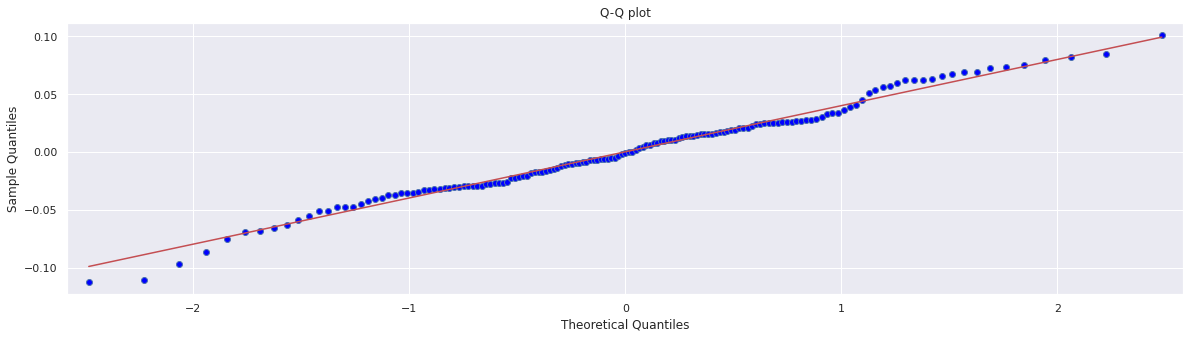

In [ ]:
from scipy import stats

def normality_of_residuals_test(model):

    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

normality_of_residuals_test(model_fit)


Dari Uji Komolgorov-smirnov menunjukan model tidak terdistribusi normal. hasil dari QQ plot juga menunjukan data tifdak terdistribusi normal. Secara kesulurahan data memang tidak terdistribusinormal namun melihat hasi QQ plot, data kami mendekati normalitas.

### Independent Residual  

In [ ]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model_fit.resid)

1.9667055802977398

Nilai Durbin Watson Statistics dibawah 2, terdapat positive auto corellation. Tetapi nilai Durbin Watson statistics sangat mendekati 2 dimana positive autocorellation sangat kecil/lemah

### Homoscedasticity

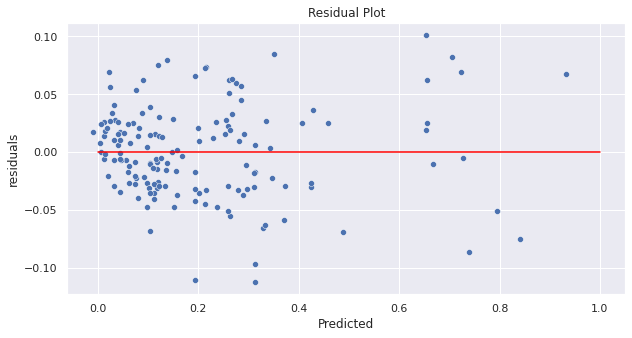

In [ ]:
fig=plt.figure(figsize=(10,5))
    

sns.scatterplot(x=model_fit.predict(), y=model_fit.resid).set(title='Residual Plot')
plt.plot(np.repeat(0, model_fit.predict().max()+2), color='red', linestyle='-')
plt.xlabel('Predicted')
plt.ylabel('residuals')
plt.show()

In [ ]:
#perform Bresuch-Pagan test
#https://www.statology.org/breusch-pagan-test-python/
#H0=model homoskedastitas
#H1=model tidak homoskedastitas
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model_fit.resid, model_fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 46.162315386196035),
 ('p-value', 0.0028551290924683378),
 ('f-value', 2.4233993701449625),
 ('f p-value', 0.0009412396632149464)]

Dari Breusch Pagan Test for homoscedascity. ditemukan p-value sebesar 0.00286, lebih kecil dari 0.05. sehingga H0 di reject sehingga ada heteroskedastitas pada model kami

## E.) koefisien determinasi dan koefisien korelasi model 

In [ ]:
x_train=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train)
model_fit=model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           1.13e-77
Time:                        15:05:01   Log-Likelihood:                 275.80
No. Observations:                 153   AIC:                            -503.6
Df Residuals:                     129   BIC:                            -430.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
RSquared=0.958

Koefisien_Korelasi= (RSquared)**(1/2)
print("Koefisien Korelasi :",Koefisien_Korelasi)

Koefisien Korelasi : 0.9787747442593725


Nilai Koefisien Determinasi (R Squared)  adalah 0.958 dan Koefisien Korelasi (R) adalah 0.978.                                                                                                                                                                                             R Squared adalah ukuran statistik yang mewakili proporsi varians untuk variabel dependen yang dijelaskan oleh variabel independen atau variabel dalam model regresi. Sedangkan koefisien korelasi menjelaskan kekuatan hubungan antara variabel independen dan dependen. R-kuadrat menjelaskan sejauh mana varians satu variabel menjelaskan varians variabel kedua. Dalam hal ini, R Squared 0.958 merepresentasikan bahwa kira kira 0.958 variasi  dapat dijelaskan oleh input model.                                                                                                                          Koefisien Korelasi (R)  adalah nilai yang menunjukan kuat/tidaknya hubungan linier antar dua variabel atau lebih. Dalam hal ini, Koefisien Korelasi adalah sebesar 0.97877, artinya terdapat korelasi positif yang kuat antara independent variable dengan dependent variable.

## F.) Berapa 95% Confidence Interval untuk Panjang, Lebar, dan Tinggi mobil

In [ ]:
from statsmodels.formula.api import ols
y= df['Harga_Mobil']
model = ols('y ~ Panjang + Lebar + Tinggi ', data=df).fit()
model.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,-156051.870439,-90502.775731
Panjang,84.895564,324.595264
Lebar,1407.877151,2658.518615
Tinggi,-956.663999,-274.995016


Untuk Intercept,  model kami memilikibatas bawah sebesar -156051.870 dan batas atas sebesar -90502.775. Untuk panjang, model kami mendapatkan batas bawah sebesar  84.895 dan batas atas sebesar 324.59. Untuk lebar, model kami mendapatkan batas bawah sebesar 1407.87 dan batas atas sebesar 2658.518. Tinggi dari model kami memilii batas bawah sebesar -956.66 dan batas atas sebesar -274.99

## G.)MSE, RMSE, MAE

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE : {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE : {}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 : {}'.format(r2_score(y_test, y_pred)))

MAE : 0.04694502943116877
MSE : 0.005779835636600316
RMSE : 0.07602523026338241
R2 : 0.888277823244119


Mean absolute error (MAE)  merepresentasikan rata-rata dari absolute difference  antara nilai aktual dan nilai prediksi. MAE juga mengukur rata-rata  residual. Semakin dekat dengan 0, maka Mean Absolute Error akan menjukan akurasi yang lebih tinggi. MAE pada model kami adalah sebesar   0.04694502943116877, yang berarti model kami  yang sangat akurat.

Mean Squared Error (MSE)  merepresentasikan rata-rata dari squared difference  antara nilai aktual dan data prediksi. MSE mengukur variansi dari residual tersebut. Sama dengan MAE, semakin mendekat 0, maka model akan  lebih akurat. Dalam hal ini, model kami menunjukkan nilai 0.005779835636600313 yang tergolong nilai yang sangat bagus dan memiliki akurasi yang tinggi .

Root Mean Squared Error (RMSE)  adalah square root dari Mean Squared error. RMSE mengukur standard deviation dari residuals. Nilai RMSE semakin mendekat 0, maka model akan lebih akurat.RMSE yang kami dapatkan adalah  0.07602523026338238 yang mengartikan model MLR kami yang sangat akurat.

Koefisien determinasi atau R-squared merepresrepresents proporsi dari  variansi dependent variable yang dijelaskan pada linear regression  model. Dengan nilai yang lebih tinggi, R-squared akan menjukkan akurasi  model yang lebih akurat. Nilai R-squared yang kami dapat kan adalah  0.888277823244119, yang termasuk model dengan akurasi cukup

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c8d5f905-8810-4ee4-b4dc-1dac8f7638e7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>